In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/NhanDang',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/NhanDang',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 284 images belonging to 10 classes.
Found 69 images belonging to 10 classes.


In [3]:
train_dataset.classes
train_dataset.class_indices

{'CR7': 0,
 'JB': 1,
 'JW': 2,
 'Karik': 3,
 'Lewy': 4,
 'Lukaku': 5,
 'M10': 6,
 'NDLN': 7,
 'Putin': 8,
 'TS': 9}

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM 
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from keras import callbacks 
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score

In [5]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [6]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history=model.fit(train_dataset,batch_size=32,epochs=150,verbose=1,validation_data=validation_dataset)

Epoch 1/150
29/29 [==============================] - 213s 7s/step - loss: 2.3854 - accuracy: 0.1338 - val_loss: 2.2821 - val_accuracy: 0.0870
Epoch 2/150
29/29 [==============================] - 1s 45ms/step - loss: 2.2571 - accuracy: 0.1514 - val_loss: 2.1977 - val_accuracy: 0.2029
Epoch 3/150
29/29 [==============================] - 1s 44ms/step - loss: 2.1125 - accuracy: 0.2570 - val_loss: 1.9780 - val_accuracy: 0.3043
Epoch 4/150
29/29 [==============================] - 1s 48ms/step - loss: 1.9137 - accuracy: 0.2923 - val_loss: 2.0456 - val_accuracy: 0.2754
Epoch 5/150
29/29 [==============================] - 2s 58ms/step - loss: 1.9069 - accuracy: 0.3239 - val_loss: 1.7809 - val_accuracy: 0.3623
Epoch 6/150
29/29 [==============================] - 2s 54ms/step - loss: 1.6989 - accuracy: 0.4296 - val_loss: 1.7644 - val_accuracy: 0.3043
Epoch 7/150
29/29 [==============================] - 1s 44ms/step - loss: 1.4846 - accuracy: 0.4648 - val_loss: 1.6046 - val_accuracy: 0.3623
Epoch 

In [10]:
model.save('NhanDang.h5')

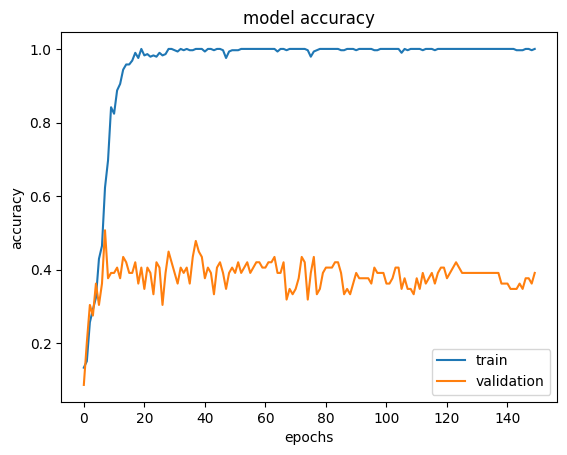

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [13]:
score = model.evaluate(validation_dataset,verbose=0)
print('Độ mất mát: ',score[0])
print('Độ chính xác: ',score[1])

Độ mất mát:  4.98607873916626
Độ chính xác:  0.3913043439388275


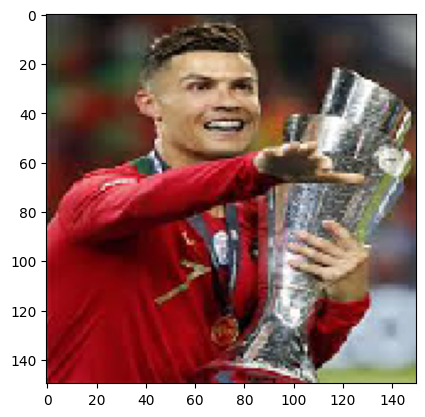

1/1 [==============================] - 0s 26ms/step
Cristiano Ronaldo


In [36]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/MyDrive/TestNhanDang/CR7 1.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Cristiano Ronaldo")
if(kq==1):
    print("Justin Bieber")
if(kq==2):
    print("Keanu Reeves")
if(kq==3):
    print("Karik")
if(kq==4):
    print("Robert Lewandowski")
if(kq==5):
    print("Romelu Lukaku")
if(kq==6):
    print("Lionel Messi")
if(kq==7):
    print("Ninh Dương Lan Ngọc")
if(kq==8):
    print("Vladimir Putin")
if(kq==9):
    print("Taylor Swift")
